# Bagging

### Aim :
To analyse the performance of SVM and Decision Tree with bagging

### Objective :
1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has
Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using support vector machine. Use standalone
model as well as Bagging model and check if you see any difference in the
performance.
6. Now use decision tree classifier. Use standalone model as well as Bagging
and check if you notice any difference in performance
7. Comparing performance of svm and decision tree classifier figure out where it
makes most sense to use bagging and why.

### Dataset
Heart Disease Dataset

### Source
Kaggle

In [ ]:
# Importing the required packages and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import LearningCurve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the dataset

df=pd.read_csv("/content/drive/MyDrive/heart1.csv")
display(df.head())


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# To check if there are any null values or duplicates

print("Is Null : \n",df.isnull().any(),"\n")
print("Duplicates : ",df.duplicated().any())

Is Null : 
 Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool 

Duplicates :  False


In [ ]:
# To find the correlation of the features wrt target variable

print(df.corr()['HeartDisease'])

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64


In [ ]:
# Making a list of column names before label encoding

cat_cols = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
cat_cols_encoded = []
for col in cat_cols:
    cat_cols_encoded += [f"{col}_{cat}" for cat in list(df[col].unique())]
print(cat_cols_encoded)

['Sex_M', 'Sex_F', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'RestingECG_LVH', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down']


In [ ]:
# Label Encoding the features with categorical value

label_encoder=preprocessing.LabelEncoder()
df["Sex"]=label_encoder.fit_transform(df["Sex"])
df["ChestPainType"]=label_encoder.fit_transform(df["ChestPainType"])
df["RestingECG"]=label_encoder.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=label_encoder.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=label_encoder.fit_transform(df["ST_Slope"])
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
enc=OneHotEncoder(sparse=False)
encoded_cols =enc.fit_transform(df[cat_cols])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
display(df_enc.head())

,Sex_M,Sex_F,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Merging the two data frames and dropping the duplicate categorical featues

df1=df.join(df_enc)
df1=df1.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1)
display(df1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Sex_F,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Scaling the dataset using MinMaxScaler

scaler=MinMaxScaler()
scaler1=scaler.fit_transform(df1)
print(scaler1)

[[0.24489796 0.7        0.47927032 ... 0.         0.         1.        ]
 [0.42857143 0.8        0.29850746 ... 0.         1.         0.        ]
 [0.18367347 0.65       0.46932007 ... 0.         0.         1.        ]
 ...
 [0.59183673 0.65       0.2172471  ... 0.         1.         0.        ]
 [0.59183673 0.65       0.39137645 ... 0.         1.         0.        ]
 [0.20408163 0.69       0.29021559 ... 0.         0.         1.        ]]


In [ ]:
# Creating a new dataframe after scaling

a=df1.columns
df2=pd.DataFrame(scaler1,columns=a)
display(df2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Sex_F,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Defining X and Y and splitting it into train and test

x=df2.drop(["HeartDisease"],axis=1)
y=df2["HeartDisease"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

The accuracy for standalone svm is 87.52 %

The Classification report of standalone svm is
               precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        79
         1.0       0.87      0.92      0.89       105

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



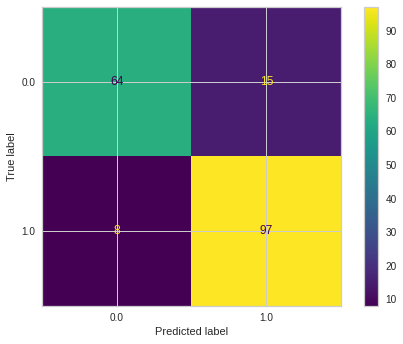

In [ ]:
# Standalone SVM calssifier

svmclf=svm.SVC()
svmclf.fit(X_train,y_train)
svmpred=svmclf.predict(X_test)
print("The accuracy for standalone svm is",round(cross_val_score(svmclf,
                                              X_test,y_test).mean()*100,2),"%\n")
print("The Classification report of standalone svm is\n",classification_report(
    y_test,svmpred))
plot_confusion_matrix(svmclf,X_test,y_test)

In [ ]:
# Accuracy of 87.52%

# Based on classification report
# Precision : Out of all the patients with heart disease the model predicted 85% of
# patients are having heart disease
# Recall : Out of all patients in the set the model correctly predicted 93% as having
# heart disease
# f1 score : It is closer to 1 therefore the model classifies better

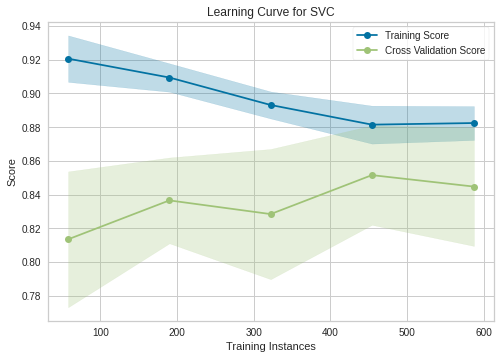

In [ ]:
# Plotting Learning Curve for Standalone SVM

svm_plot=LearningCurve(svmclf,scoring='accuracy')
svm_plot.fit(X_train,y_train)
svm_plot.predict(X_test)
svm_plot.show()

In [ ]:
# Based on our learning curve we can say that the model is overfit because the
# training loss
# continues to decrease with experience at the same time the validation loss decrease
# and begins to increase.

The testing accuracy for bagging svm is 84.61 %

The Classification report of bagging svm is
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        79
         1.0       0.88      0.92      0.90       105

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



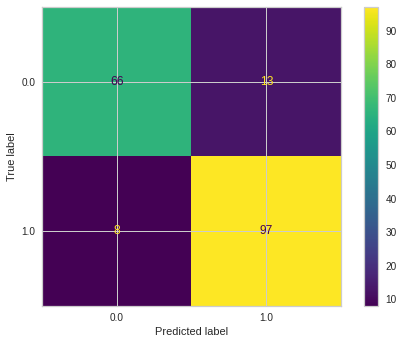

In [ ]:
# Bagging using SVM

bagging_svm=BaggingClassifier(base_estimator=svmclf,n_estimators=10)
bagging_svm.fit(X_train,y_train)
bagsvm_pred=bagging_svm.predict(X_test)
print("The testing accuracy for bagging svm is",round(cross_val_score(
    bagging_svm,X_train,y_train).mean()*100,2),"%\n")
print("The Classification report of bagging svm is\n",classification_report(
    y_test,bagsvm_pred))
plot_confusion_matrix(bagging_svm,X_test,y_test)

In [ ]:
# Accuracy of 84.61%

# Based on classification report
# precision : The model predicted that 88% percent of patients have heart disease
# Recall : The model correctly predicted 92% percent of patients correctly have heart
# disease
# f1 score : The model classifies better

# Based on Confusion matrix we can see that
# There are 66 TP, 97 TN, 13 FN, 8 FP i.e 13 people have heart disease but is
# predicted as normal 8 people donot have heart disease but are predicted as normal

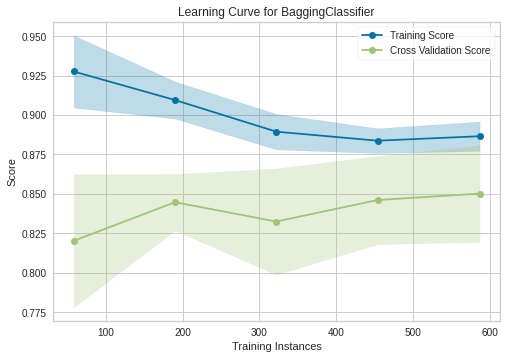

In [ ]:
# Plotting Learning Curve for Bagging SVM

svm_plot=LearningCurve(bagging_svm,scoring='accuracy')
svm_plot.fit(X_train,y_train)
svm_plot.predict(X_test)
svm_plot.show()

In [ ]:
# This model is also overfit because the training loss begins to decrease with
# experience and the validation loss is decreasing an dincreasing with experience

The testing accuracy for standalone decision tree is 80.65 %

The Classification report of standalone Decision tree classifier is
               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79        79
         1.0       0.86      0.81      0.83       105

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



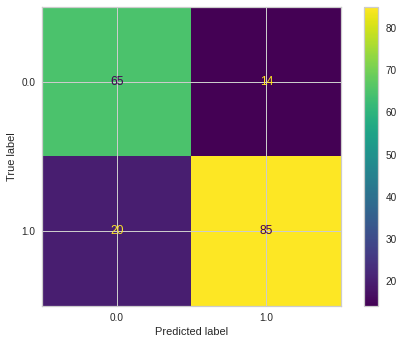

In [ ]:
# Standalone Decision Tree Classifier

dtclf=DecisionTreeClassifier()
dtclf.fit(X_train,y_train)
dtclf_pred=dtclf.predict(X_test)
print("The testing accuracy for standalone decision tree is",round(cross_val_score(
    dtclf,X_train,y_train).mean()*100,2),"%\n")
print("The Classification report of standalone Decision tree classifier is\n",
      classification_report(y_test,dtclf_pred))
plot_confusion_matrix(dtclf,X_test,y_test)

In [ ]:
# Accuracy of 80.65%

# Based on classification report
# precision : The model predicted that 86% percent of patients have heart disease
# Recall : The model correctly predicted 81% percent of patients correctly have
# heart disease
# f1 score : The model classifies better

# Based on Confusion matrix we can see that
# There are 65 TP, 85 TN, 14 FN, 20 FP i.e 14 people have heart disease but is
# predicted as normal
# 20 people donot have heart disease but are predicted as having heart disease

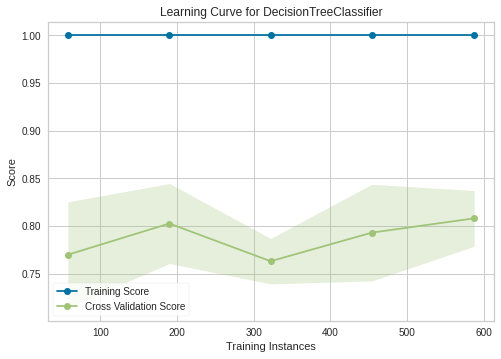

In [ ]:
# Plotting Learning Curve for Standalone DecisionTree Classifier

svm_plot=LearningCurve(dtclf,scoring='accuracy')
svm_plot.fit(X_train,y_train)
svm_plot.predict(X_test)
svm_plot.show()

In [ ]:
# This model is underfit because the training loss is a flat line

The testing accuracy for bagging decision tree is 82.97 %

The Classification report of bagging DecisionTree Classifier is
               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        79
         1.0       0.83      0.81      0.82       105

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



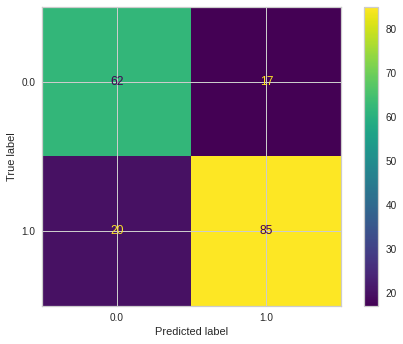

In [ ]:
# Bagging using Decision Tree Classifier

bagging_dt=BaggingClassifier(base_estimator=dtclf,n_estimators=10)
bagging_dt.fit(X_train,y_train)
bagdt_pred=bagging_dt.predict(X_test)
print("The testing accuracy for bagging decision tree is",round(cross_val_score(
    bagging_dt,X_train,y_train).mean()*100,2),"%\n")
print("The Classification report of bagging DecisionTree Classifier is\n",
      classification_report(y_test,bagdt_pred))
plot_confusion_matrix(bagging_dt,X_test,y_test)

In [ ]:
# Accuracy of 82.97%

# Based on classification report
# precision : The model predicted that 83% percent of patients have heart disease
# Recall : The model correctly predicted 81% percent of patients correctly have heart
# disease
# f1 score : The model classifies better

# Based on Confusion matrix we can see that
# There are 62 TP, 85 TN, 17 FN, 20 FP i.e 17 people have heart disease but is
# predicted as normal 20 people donot have heart disease but are predicted as normal

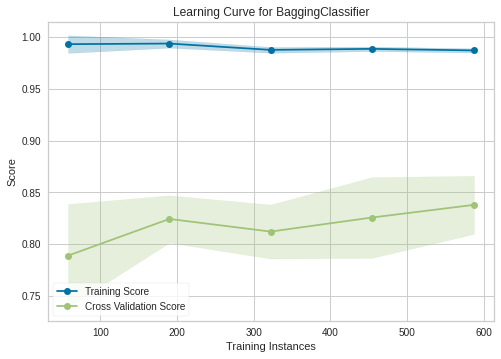

In [ ]:
# Plotting Learning Curve for Bagging DecisionTree Classifier

svm_plot=LearningCurve(bagging_dt,scoring='accuracy')
svm_plot.fit(X_train,y_train)
svm_plot.predict(X_test)
svm_plot.show()

In [ ]:
# This model is also underfit because the training loss is a flat line

In [ ]:
# Conclusion

# Based on accuracy Standalone SVM has high accuracy and also the FP rate is low
# therefore this model is better than other.